In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#Import the data
df = pd.read_csv("old_faithful.tsv",sep = '\t')
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


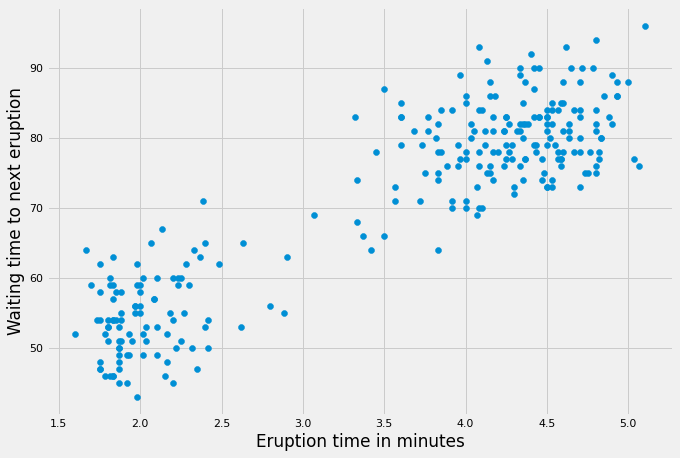

In [4]:
plt.figure(figsize = (10, 7))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel("Eruption time in minutes")
plt.ylabel("Waiting time to next eruption")
plt.show()

In [5]:
#Standardize the data...Since KMeans uses a distance based metric
sc = StandardScaler()
x_scaled = sc.fit_transform(df)

In [6]:
km = KMeans(n_clusters = 2, max_iter = 100)
km.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
centroids = km.cluster_centers_

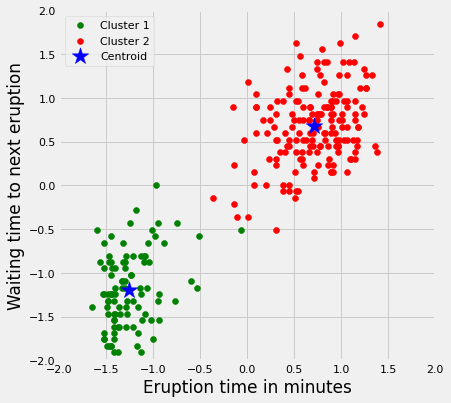

In [11]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.scatter(x_scaled[km.labels_ == 0, 0], x_scaled[km.labels_ == 0, 1], c = 'green', label = 'Cluster 1')
plt.scatter(x_scaled[km.labels_ == 1, 0], x_scaled[km.labels_ == 1, 1], c = 'red', label = 'Cluster 2')
plt.scatter(centroids[:, 0], centroids[:,1], marker = "*", s = 300, c = 'blue', label = 'Centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Eruption time in minutes")
plt.ylabel("Waiting time to next eruption")
plt.show()

In [14]:
#Sum of squared error
print(km.inertia_)

79.57595948827701


##### Choosing the right value of `k` using Silhouette Analysis

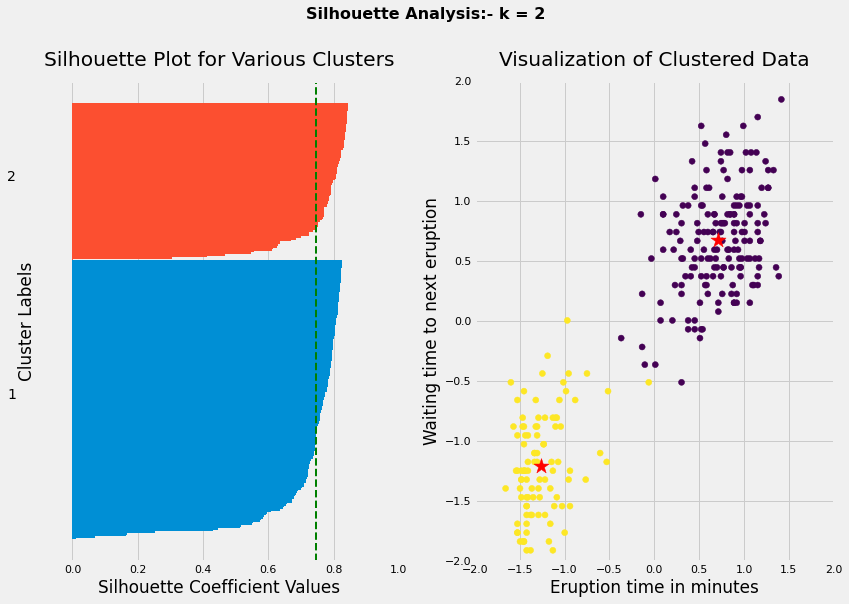

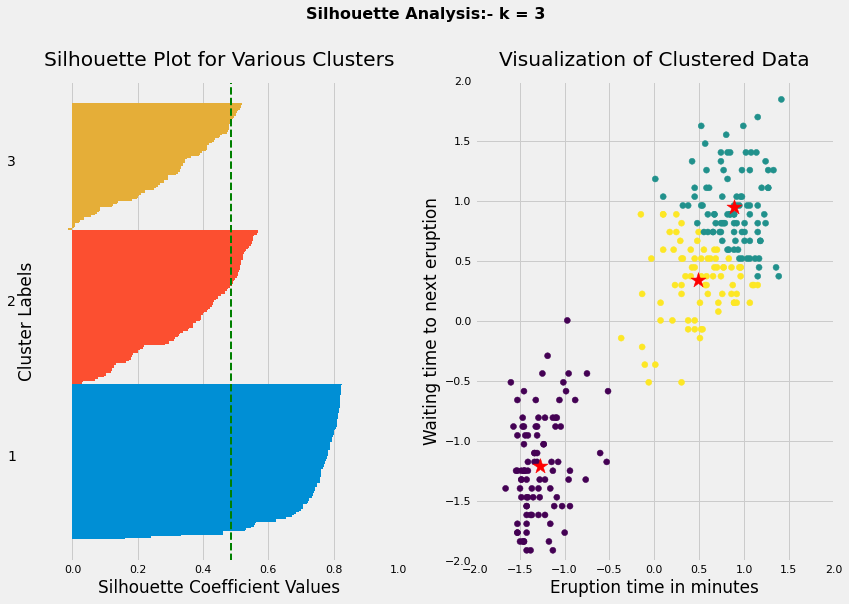

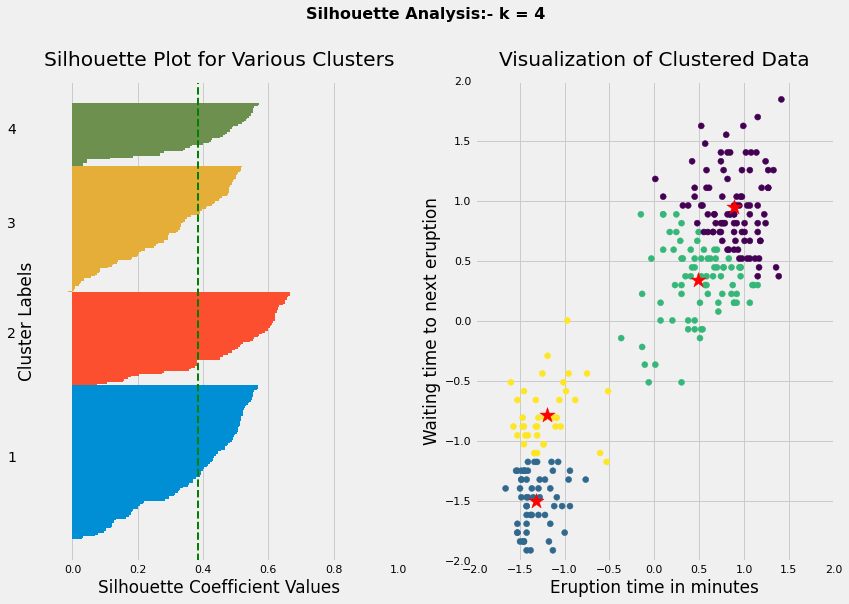

In [23]:
n_clusters = [2, 3, 4]

for i, k in enumerate(n_clusters):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 8)
    
    #Run KMeans
    km = KMeans(n_clusters = k)
    labels = km.fit_predict(x_scaled)
    centroids = km.cluster_centers_
    
    #Get silhouette samples
    silhouette_values = silhouette_samples(x_scaled, labels)
    
    #Plot
    y_ticks = []
    ylower, yupper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_values[labels == cluster]
        cluster_silhouette_vals.sort()
        yupper += len(cluster_silhouette_vals)
        ax1.barh(range(ylower, yupper), cluster_silhouette_vals, edgecolor = 'none', height = 1)
        ax1.text(-0.2, (ylower + yupper)/2, str(i + 1))
        ylower += len(cluster_silhouette_vals)
        
    #Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_values)
    #Add vertical line across the axis
    ax1.axvline(avg_score, linestyle = '--', linewidth = 2, color = 'green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Labels")
    ax1.set_title('Silhouette Plot for Various Clusters', y = 1.02);
    
    
    ax2.scatter(x_scaled[:, 0], x_scaled[:, 1], c = labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker = '*', c = 'r', s = 250)
    ax2.set_xlim([-2, 2])
    ax2.set_ylim([-2, 2])
    ax2.set_xlabel("Eruption time in minutes")
    ax2.set_ylabel("Waiting time to next eruption")
    ax2.set_title("Visualization of Clustered Data", y = 1.02)
    plt.tight_layout()
    plt.suptitle(f"Silhouette Analysis:- k = {k}", fontsize = 16, fontweight = 'bold', y = 1.05);
    plt.show()

#### As we can see from the bar graph, `k = 2` is the most desirable value as we get a higher Silhouette score for that one.
#### We can also use the `Elbow Method` to determine a suitable value of `k`.

In [25]:
n_clusters = range(1, 10)
sse = []
for k in n_clusters:
    km = KMeans(n_clusters=k)
    km.fit(x_scaled)
    sse.append(km.inertia_)

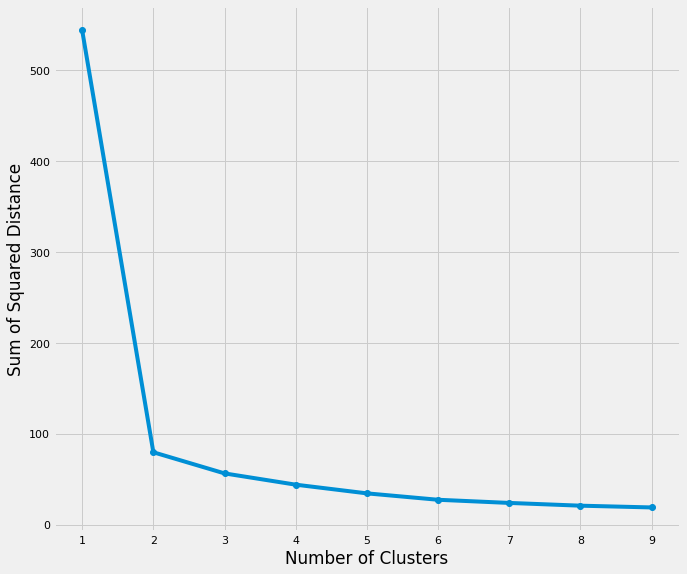

In [26]:
plt.figure(figsize = (10, 9))
plt.plot(n_clusters, sse, '-o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distance")
plt.show()

#### From the above plot, it is also evident that given our data the optimal number of clusters is `k = 2 (The Elbow Point)`.